In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
df_index = pd.read_csv('economics_index.csv')

In [3]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.3,1256


In [5]:
df_index.drop(columns=['Unnamed: 0', 'year', 'month'], axis=1, inplace=True)

In [6]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.3,1256


In [7]:
#check null values
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

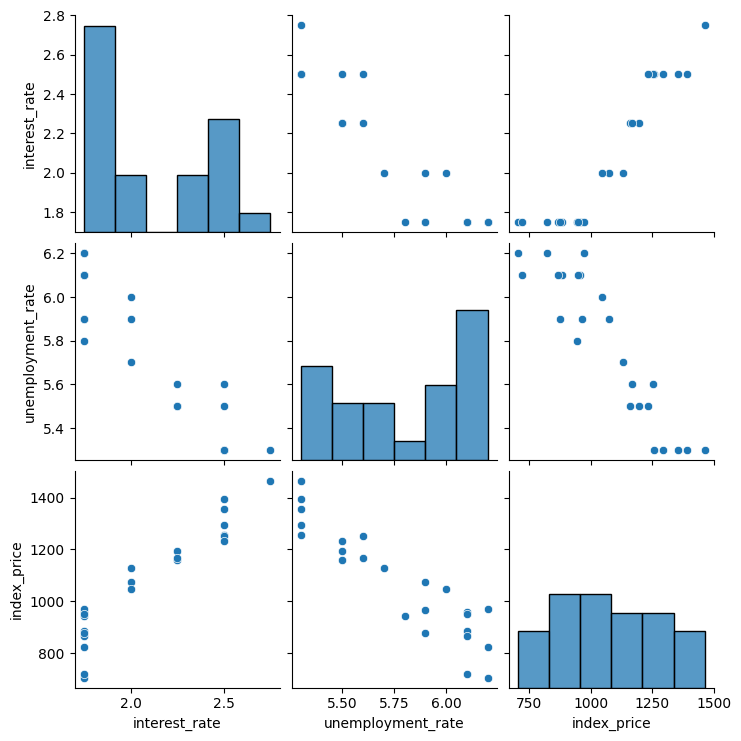

In [8]:
import seaborn as sns
sns.pairplot(df_index)

In [9]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.926401,0.935793
unemployment_rate,-0.926401,1.000000,-0.918581
index_price,0.935793,-0.918581,1.000000


Text(0, 0.5, 'Unemployment rate')

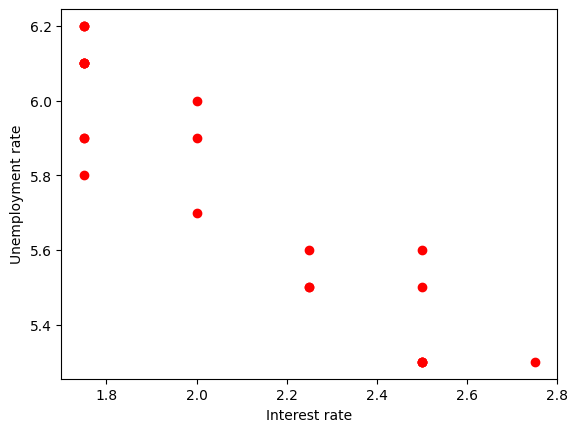

In [12]:
plt.scatter(df_index['interest_rate'], df_index['unemployment_rate'], color='r')
plt.xlabel('Interest rate')
plt.ylabel('Unemployment rate')

In [14]:
#Independent and dependent features
X = df_index.iloc[:,:-1]
y = df_index.iloc[:,-1]

In [16]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.3


In [17]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25,random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

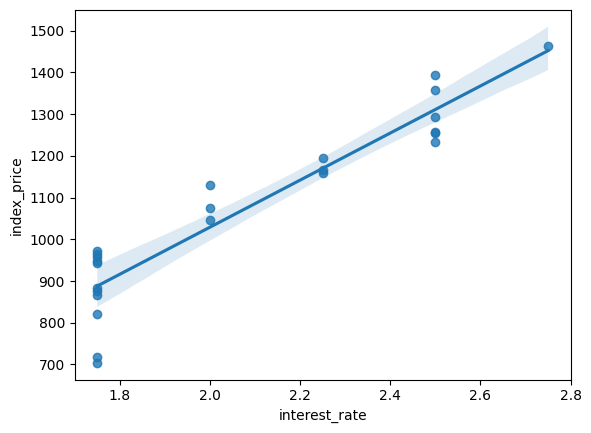

In [25]:
import seaborn as sns
sns.regplot(x=df_index['interest_rate'], y=df_index['index_price'])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

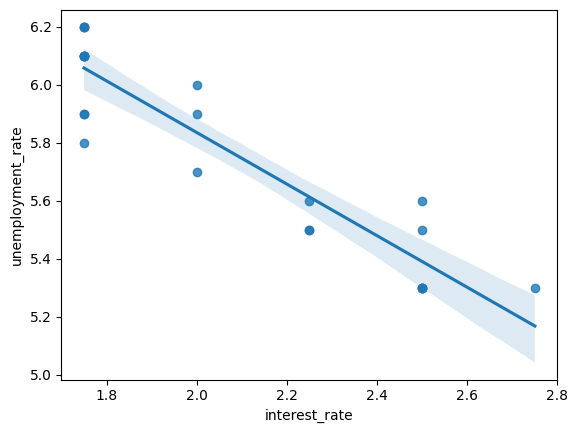

In [26]:
sns.regplot(x=df_index['interest_rate'], y=df_index['unemployment_rate'])

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

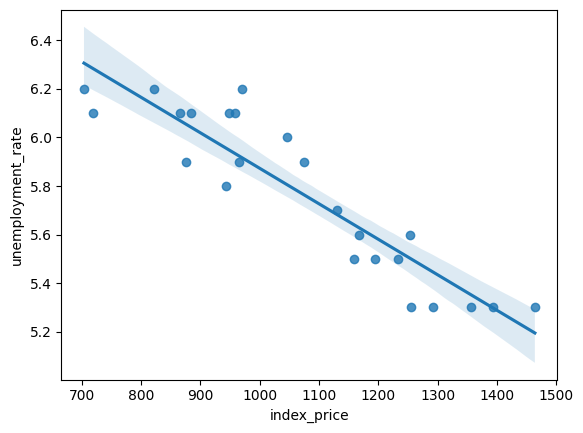

In [28]:
sns.regplot(x=df_index['index_price'], y=df_index['unemployment_rate'])

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()

In [31]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [32]:
X_train

array([[-0.90115511,  0.38760987],
       [ 1.31077107, -1.43247125],
       [-0.90115511,  1.29765042],
       [ 1.31077107, -0.52243069],
       [ 1.31077107, -1.43247125],
       [-0.16384638,  0.69095672],
       [-0.90115511,  0.99430357],
       [ 1.31077107, -1.43247125],
       [ 1.31077107, -1.43247125],
       [-0.90115511,  1.29765042],
       [-0.90115511,  0.99430357],
       [-0.90115511,  0.38760987],
       [-0.90115511,  0.99430357],
       [ 0.57346234, -0.82577754],
       [-0.16384638, -0.21908384],
       [-0.90115511,  0.08426301],
       [-0.90115511,  0.99430357],
       [ 1.31077107, -0.82577754]])

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
regression = LinearRegression()

In [35]:
regression.fit(X_train, y_train)

LinearRegression()

In [38]:
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression,X_train, y_train, scoring = 'neg_mean_squared_error',
                    cv=3)

In [40]:
np.mean(validation_score)

np.float64(-6584.336863425749)

In [41]:
y_pred = regression.predict(X_test)

In [42]:
y_pred

array([1177.92135045,  804.89102529, 1380.66444988,  838.94847044,
        974.3774653 , 1143.86390531])

In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [44]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

7930.806096420248
72.86267237267036
89.05507338956185


In [45]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print(score)

0.7644175070869483


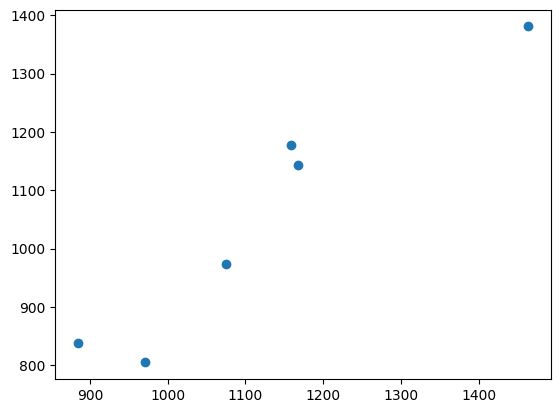

In [46]:
plt.scatter(y_test, y_pred)

In [47]:
residuals = y_test - y_pred    #Errors occured
print(residuals)

8     -18.921350
16    166.108975
0      83.335550
18     45.051530
11    100.622535
9      23.136095
Name: index_price, dtype: float64


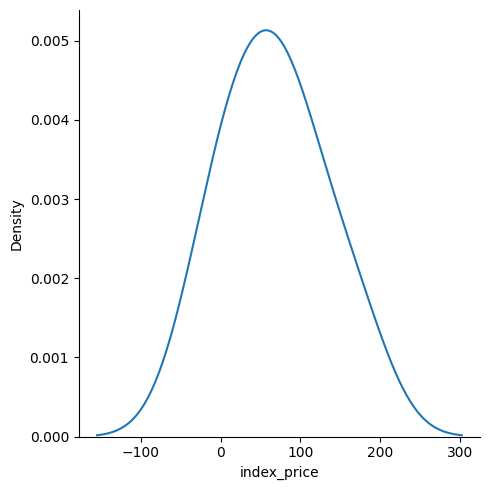

In [49]:
sns.displot(residuals, kind='kde')

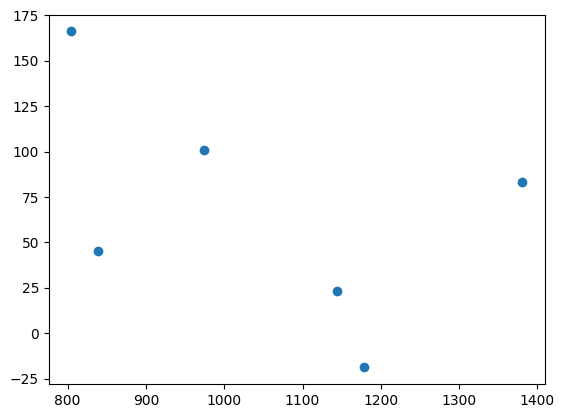

In [50]:
plt.scatter(y_pred, residuals)

In [52]:
import statsmodels.api as sm
model = sm.OLS(y_train, X_train).fit()

In [54]:
model.summary()

c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2862
Date:                Tue, 28 Jan 2025   Prob (F-statistic):                       0.755
Time:                        19:46:52   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            93.1922    665.875      0.140      0.890   -1318.400    1504.784
x2          -110.6503    665.875     -0.166      0.870   -1522.243    1300.942
==============================================================================
Omnibus:                        0.881   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.644   Jarque-Bera (JB):                0.812
Skew:                          -0.434   Prob(JB):                        0.666
Kurtosis:                       2.426   Cond. No.                         4.84
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
print(regression.coef_)

[  93.19215789 -110.65030458]
